In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
data=pd.read_csv("/content/insurance.csv",sep = ',')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data['sex'] = np.where(data['sex'] == 'male',0, 1)
data['smoker'] = np.where(data['smoker'] == 'no',0, 1)

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

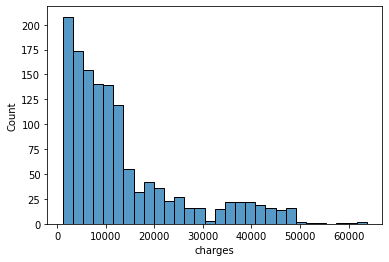

In [ ]:
sns.histplot(data['charges'])

histogram of different ages

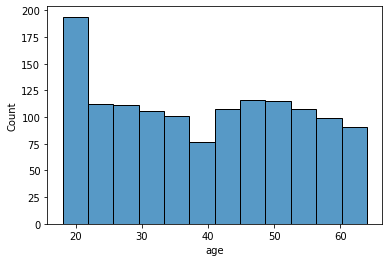

In [ ]:
sns.histplot(data['age'])

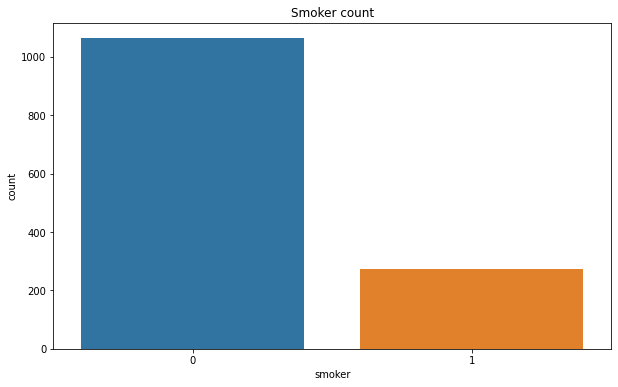

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="smoker", data=data)
plt.title("Smoker count")
plt.show()

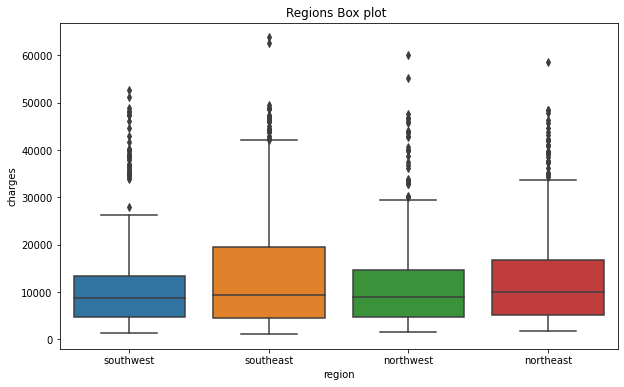

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="region", y="charges", data=data)
plt.title("Regions Box plot ")
plt.show()

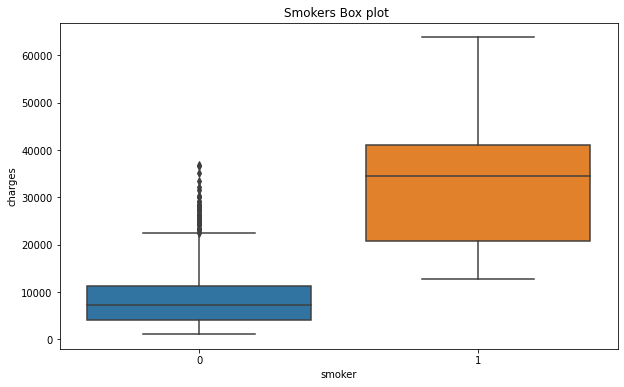

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="smoker", y="charges", data=data)
plt.title("Smokers Box plot ")
plt.show()

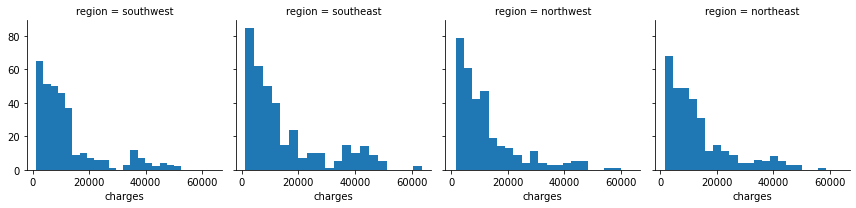

In [ ]:
cor=sns.FacetGrid(data,col='region')
cor.map(plt.hist,'charges',bins=20)

In [ ]:
reg = pd.get_dummies(data['region'])
data = data.drop('region', axis = 1)
data = data.join(reg)
data

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


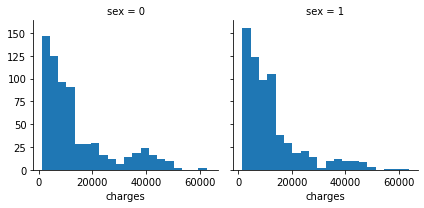

In [ ]:
cor=sns.FacetGrid(data,col='sex')
cor.map(plt.hist,'charges',bins=20)

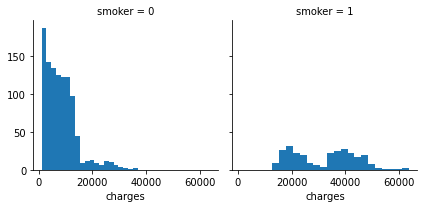

In [ ]:
cor=sns.FacetGrid(data,col='smoker')
cor.map(plt.hist,'charges',bins=20)

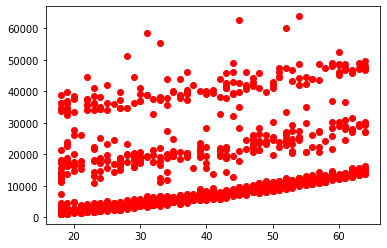

In [ ]:
plt.plot(data["age"], data["charges"],'ro')
plt.show()

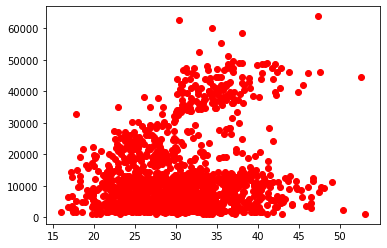

In [ ]:
plt.plot(data["bmi"], data["charges"],'ro')
plt.show()

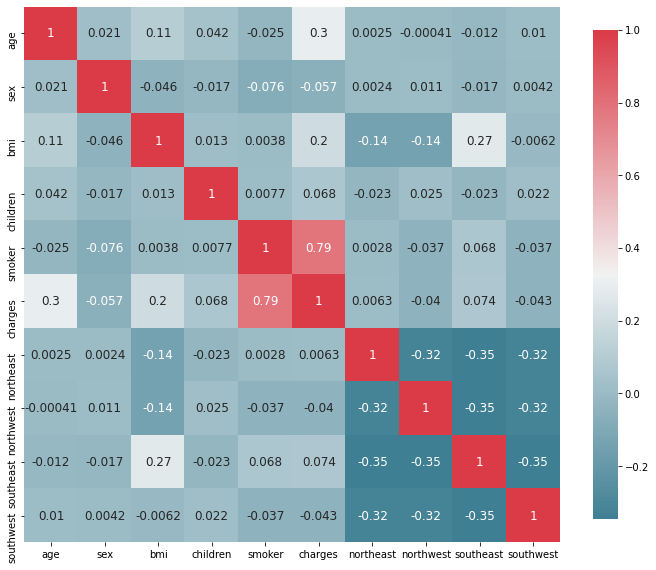

In [ ]:
def plot_correlation_map( data ):

    corr = data.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(data)

Polynomial regression

In [ ]:
x = data[['sex','bmi','age','children','smoker','northeast','northwest','southeast','southwest']]
y = data['charges']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=30)  

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import sklearn
from sklearn.linear_model import LinearRegression

poly= PolynomialFeatures(degree=3)
lg = LinearRegression()
x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit,y_train)

x_test_ =poly.fit_transform(x_test)
predicted=lg.predict(x_test_)

print("MSE :",metrics.mean_squared_error(y_test,predicted))
print("R Squared : ",metrics.r2_score(y_test,predicted))

MSE : 23679852.391237207
R Squared :  0.8478380666119238


Multi-Linear Regression

In [ ]:
data[['sex','bmi','age','children','smoker','northeast','northwest','southeast','southwest']]
y=data["charges"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=37) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", metrics.mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 50383417.0999931
R squared 0.662534060726347
